In [6]:
import sqlite3

connection = sqlite3.connect('student_grades.db')

cursor = connection.cursor()

create_students_table = """
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT,
    last_name TEXT
);
"""

create_grades_table = """
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER,
    subject TEXT,
    grade INTEGER,
    FOREIGN KEY (student_id) REFERENCES students (student_id)
);
"""

cursor.execute(create_students_table)
cursor.execute(create_grades_table)

connection.commit()

connection.close()

In [7]:
import sqlite3

connection = sqlite3.connect('student_grades.db')

cursor = connection.cursor()

students_data = [
    ('Alice', 'Johnson'),
    ('Bob', 'Smith'),
    ('Carol', 'White'),
    ('David', 'Brown'),
    ('Eve', 'Davis')
]

grades_data = [
    (1, 'Math', 95),
    (1, 'English', 88),
    (1, 'History', 90),
    (2, 'Math', 82),
    (2, 'English', 76),
    (2, 'History', 85),
    (3, 'Math', 91),
    (3, 'English', 89),
    (3, 'History', 92),
    (4, 'Math', 78),
    (4, 'English', 84),
    (4, 'History', 80),
    (5, 'Math', 88),
    (5, 'English', 90),
    (5, 'History', 87)
]

cursor.executemany("INSERT INTO students (first_name, last_name) VALUES (?, ?);", students_data)
cursor.executemany("INSERT INTO grades (student_id, subject, grade) VALUES (?, ?, ?);", grades_data)


connection.commit()

connection.close()

In [8]:
import sqlite3

connection = sqlite3.connect('student_grades.db')
cursor = connection.cursor()

# 1. Retrieve all students' names and their grades
cursor.execute("""
SELECT s.first_name || ' ' || s.last_name AS student_name, g.grade 
FROM grades g
JOIN students s ON g.student_id = s.student_id;
""")
all_students_grades = cursor.fetchall()
print("All students' names and their grades:", all_students_grades)

# 2. Find the average grade for each student
cursor.execute("""
SELECT s.first_name || ' ' || s.last_name AS student_name, AVG(g.grade) AS average_grade 
FROM grades g
JOIN students s ON g.student_id = s.student_id
GROUP BY s.student_id;
""")
average_grades = cursor.fetchall()
print("Average grade for each student:", average_grades)

# 3. Find the student with the highest average grade
cursor.execute("""
SELECT s.first_name || ' ' || s.last_name AS student_name, AVG(g.grade) AS average_grade 
FROM grades g
JOIN students s ON g.student_id = s.student_id
GROUP BY s.student_id
ORDER BY average_grade DESC 
LIMIT 1;
""")
top_student = cursor.fetchone()
print("Student with the highest average grade:", top_student)

# 4. Find the average grade for the Math subject
cursor.execute("""
SELECT AVG(g.grade) AS average_math_grade 
FROM grades g
WHERE g.subject = 'Math';
""")
average_math_grade = cursor.fetchone()
print("Average grade for Math subject:", average_math_grade)

# 5. List all students who scored above 90 in any subject
cursor.execute("""
SELECT DISTINCT s.first_name || ' ' || s.last_name AS student_name 
FROM grades g
JOIN students s ON g.student_id = s.student_id
WHERE g.grade > 90;
""")
students_above_90 = cursor.fetchall()
print("Students who scored above 90 in any subject:", students_above_90)

connection.close()

All students' names and their grades: [('Alice Johnson', 95), ('Alice Johnson', 88), ('Alice Johnson', 90), ('Bob Smith', 82), ('Bob Smith', 76), ('Bob Smith', 85), ('Carol White', 91), ('Carol White', 89), ('Carol White', 92), ('David Brown', 78), ('David Brown', 84), ('David Brown', 80), ('Eve Davis', 88), ('Eve Davis', 90), ('Eve Davis', 87)]
Average grade for each student: [('Alice Johnson', 91.0), ('Bob Smith', 81.0), ('Carol White', 90.66666666666667), ('David Brown', 80.66666666666667), ('Eve Davis', 88.33333333333333)]
Student with the highest average grade: ('Alice Johnson', 91.0)
Average grade for Math subject: (86.8,)
Students who scored above 90 in any subject: [('Alice Johnson',), ('Carol White',)]


     student_name  subject  grade
0   Alice Johnson     Math     95
1   Alice Johnson  English     88
2   Alice Johnson  History     90
3       Bob Smith     Math     82
4       Bob Smith  English     76
5       Bob Smith  History     85
6     Carol White     Math     91
7     Carol White  English     89
8     Carol White  History     92
9     David Brown     Math     78
10    David Brown  English     84
11    David Brown  History     80
12      Eve Davis     Math     88
13      Eve Davis  English     90
14      Eve Davis  History     87


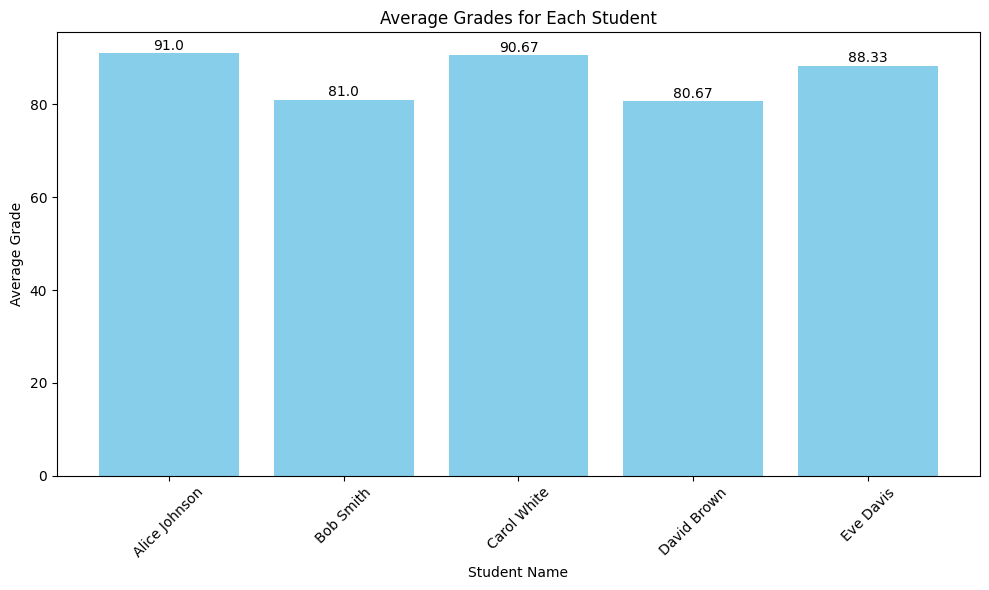

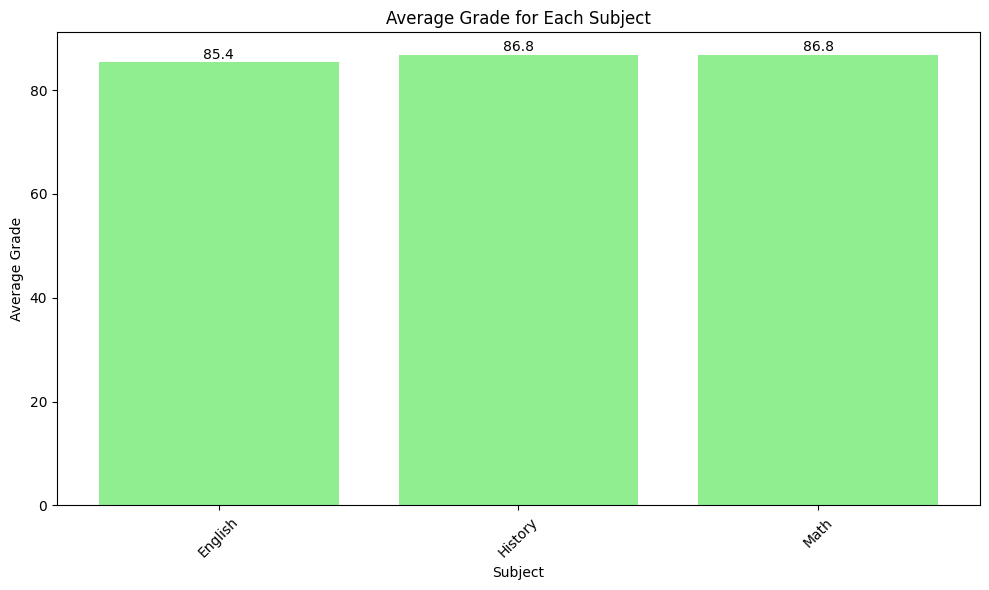

In [16]:
!pip install matplotlib

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

connection = sqlite3.connect('student_grades.db')

students_df = pd.read_sql_query("SELECT * FROM students;", connection)
grades_df = pd.read_sql_query("SELECT * FROM grades;", connection)

combined_df = pd.read_sql_query("""
SELECT s.first_name || ' ' || s.last_name AS student_name, g.subject, g.grade
FROM grades g
JOIN students s ON g.student_id = s.student_id;
""", connection)

connection.close()

print(combined_df)

# average grades for each student
average_grades_df = combined_df.groupby('student_name')['grade'].mean().reset_index()
plt.figure(figsize=(10, 6))
bars = plt.bar(average_grades_df['student_name'], average_grades_df['grade'], color='skyblue')
plt.xlabel('Student Name')
plt.ylabel('Average Grade')
plt.title('Average Grades for Each Student')
plt.xticks(rotation=45)
plt.tight_layout()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

plt.show()

# bar chart: average grade for each subject
average_subject_grades_df = combined_df.groupby('subject')['grade'].mean().reset_index()
plt.figure(figsize=(10, 6))
bars = plt.bar(average_subject_grades_df['subject'], average_subject_grades_df['grade'], color='lightgreen')
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.title('Average Grade for Each Subject')
plt.xticks(rotation=45)
plt.tight_layout()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

plt.show()

    student_name  subject  grade
0  Alice Johnson     Math     95
1    Carol White  History     92
2      Eve Davis  English     90


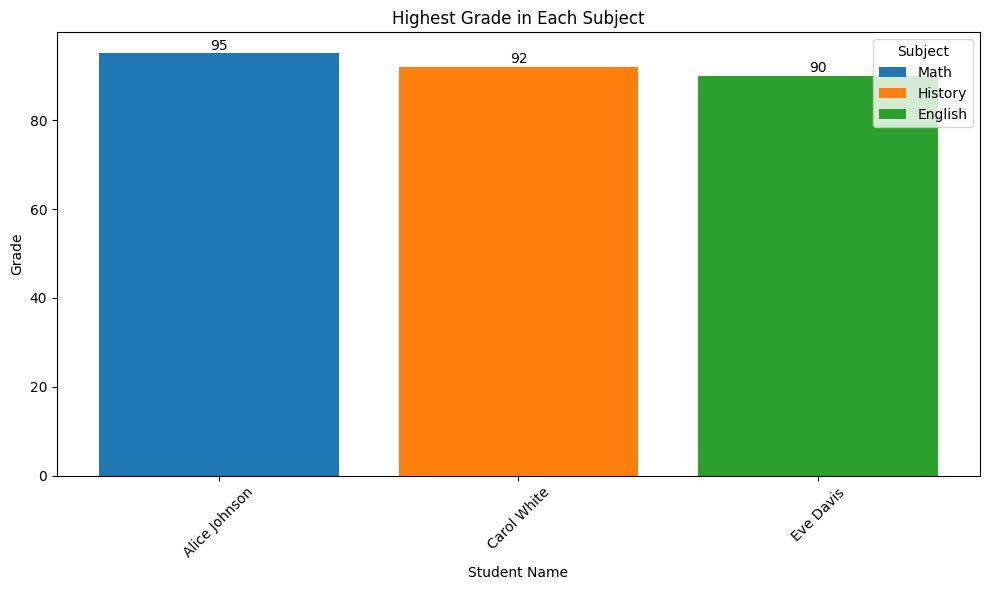

In [15]:
# Bonus task

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

connection = sqlite3.connect('student_grades.db')

students_df = pd.read_sql_query("SELECT * FROM students;", connection)
grades_df = pd.read_sql_query("SELECT * FROM grades;", connection)

combined_df = pd.read_sql_query("""
SELECT s.first_name || ' ' || s.last_name AS student_name, g.subject, g.grade
FROM grades g
JOIN students s ON g.student_id = s.student_id;
""", connection)

# highest grade in each subject
highest_grades_df = pd.read_sql_query("""
SELECT s.first_name || ' ' || s.last_name AS student_name, g.subject, g.grade
FROM grades g
JOIN students s ON g.student_id = s.student_id
WHERE (g.subject, g.grade) IN (
    SELECT subject, MAX(grade)
    FROM grades
    GROUP BY subject
);
""", connection)

connection.close()

print(highest_grades_df)

# grouped bar chart
plt.figure(figsize=(10, 6))
bars = []
for subject in highest_grades_df['subject'].unique():
    subject_df = highest_grades_df[highest_grades_df['subject'] == subject]
    bar = plt.bar(subject_df['student_name'], subject_df['grade'], label=subject)
    bars.extend(bar)

# Add labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Student Name')
plt.ylabel('Grade')
plt.title('Highest Grade in Each Subject')
plt.legend(title='Subject')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()